### Problem Statement:
Bike sharing systems are a new generation of traditional bike rentals where the whole
process from membership, rental and return back has become automatic. Through these
systems, users are able to easily rent a bike from a particular position and return back at
another position. Currently, there are about over 500 bike-sharing programs around the
world which is composed of over 500 thousand bicycles. Today, there exists great interest in
these systems due to their important role in traffic, environmental and health issues. Apart
from interesting real-world applications of bike sharing systems, the characteristics of data
being generated by these systems make them attractive for the research.
The goal here is to build an end-to-end regression task. Here the user will provide the data
and the result will be given by the best performing hyper tuned Machine Learning model.
The user will also get privileges to choose the deployment options.

![alt text](https://www.icebike.org/wp-content/uploads/2015/09/top-bike-share-27538099.jpg "Bike Share")


### About the dataset 
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

### Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

## Importing necessary Libraries

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
pd.options.display.max_columns = 200

In [65]:
df = pd.read_csv("hour.csv")

In [66]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Exploring the dataset
* Checking for datatypes for each column
* Checking for null values / missing values in the dataset
* Checking for unique valuee in the dataset
* Using the describe method to find some standard values about the columns such as mean, standard deviation etc.

In [67]:
df.apply(lambda x:len(x.unique()))  # Checking unique values in each column

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [68]:
df.isnull().sum() # Checking null values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [71]:
df[df['cnt'] == 1]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
30,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1
49,50,2011-01-03,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1
71,72,2011-01-04,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1
17215,17216,2012-12-25,1,1,12,4,1,2,0,2,0.24,0.2576,0.87,0.0896,0,1,1
17237,17238,2012-12-26,1,1,12,2,0,3,1,2,0.26,0.2273,0.65,0.2985,0,1,1
17262,17263,2012-12-27,1,1,12,3,0,4,1,2,0.24,0.2273,0.87,0.2239,0,1,1


In [72]:
df[df['cnt'] == 977]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


## Initial Observations from the data:- 
* The maximun number of bike rented for date 2012-09-12 was 977
* We have quite a few days on which the bike rent rount was 1
* On Average people are renting 189 bikes throught the duration mentioned.
* There are no null values present in the dataset. 

The data is clean and already pre processed by getting all the necessary information from the date column.



## Renaming the columns for better understanding.

In [73]:
df = df.rename(columns = {'yr':'year',
                          'mnth': 'month',
                          'hr': 'hour',
                          'hum': 'humidity',
                          'cnt': 'count',
                          'weathersit': 'weather',
                          'dteday': 'date'
})

## Performing EDA 

In [74]:
df.head(2)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [75]:
df['count'].value_counts().sort_index(ascending=True)

1      158
2      208
3      224
4      231
5      260
      ... 
967      1
968      1
970      1
976      1
977      1
Name: count, Length: 869, dtype: int64

In [76]:
pair_plot_df = df.copy()
pair_plot_df = pair_plot_df.drop(['instant','date','year','hour','holiday','weekday','workingday','weather','casual','registered'], axis = 1)
pair_plot_df.head(3)

,season,month,temp,atemp,humidity,windspeed,count
0,1,1,0.24,0.2879,0.81,0.0,16
1,1,1,0.22,0.2727,0.80,0.0,40
2,1,1,0.22,0.2727,0.80,0.0,32


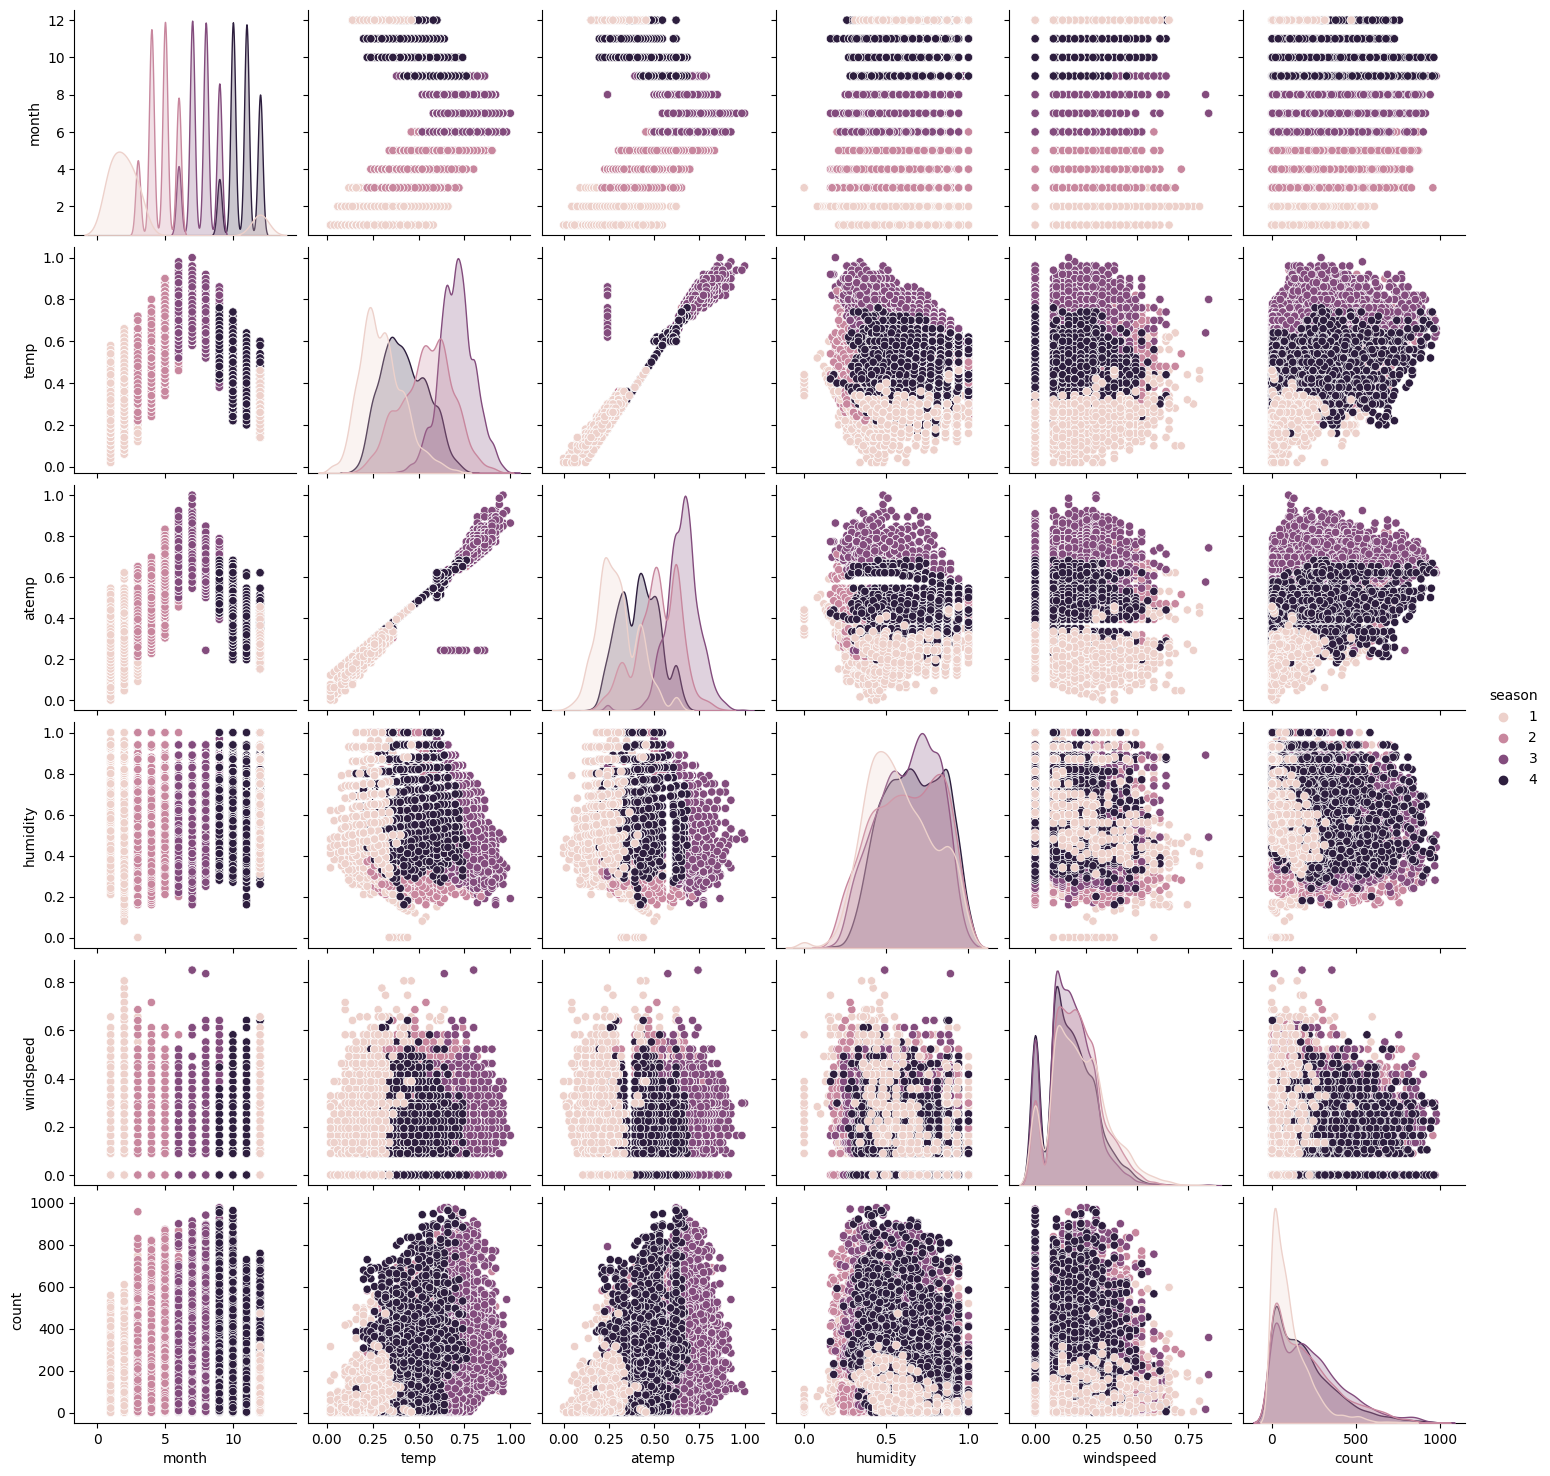

In [77]:
sns.pairplot(data=pair_plot_df, hue='season')

<AxesSubplot: xlabel='season', ylabel='count'>

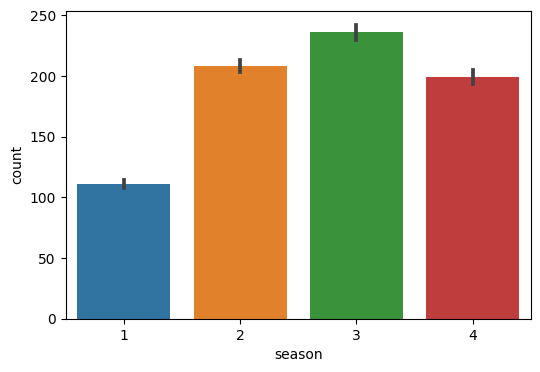

In [78]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'season', y= 'count',data=df)

<AxesSubplot: xlabel='month', ylabel='count'>

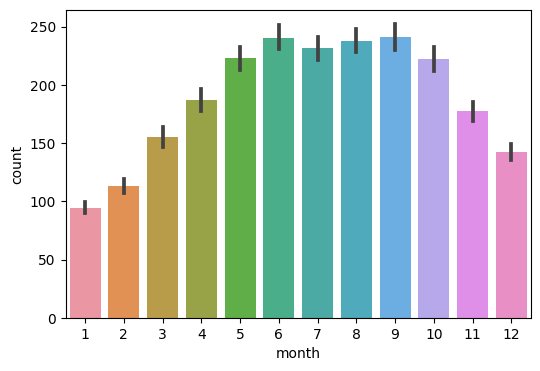

In [79]:
plt.figure(figsize = (6,4))
sns.barplot(x= 'month', y = 'count', data=df)

<AxesSubplot: xlabel='season', ylabel='count'>

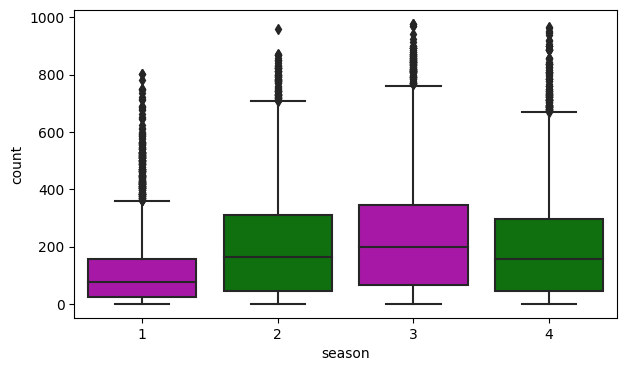

In [80]:
plt.figure(figsize = (7,4))
sns.boxplot(x="season", y="count", palette=["m", "g"],data=df)


<AxesSubplot: xlabel='count'>

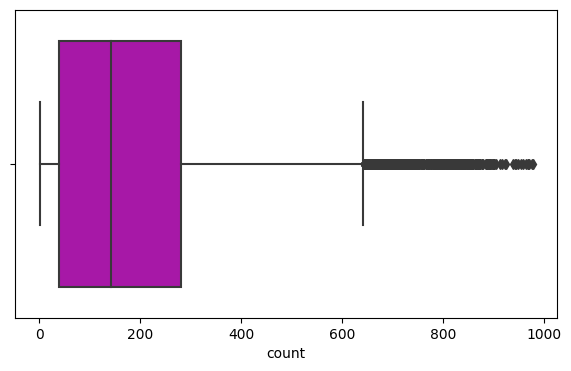

In [81]:
plt.figure(figsize = (7,4))
sns.boxplot(x="count", palette=["m", "g"],data=df)

<AxesSubplot: xlabel='workingday', ylabel='count'>

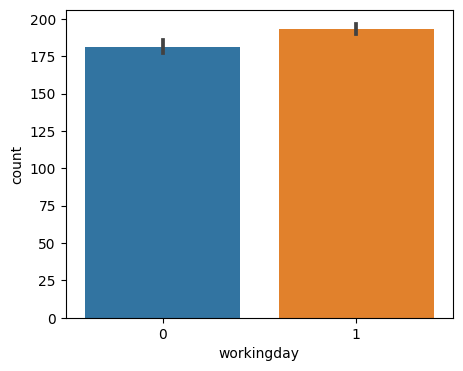

In [82]:
plt.figure(figsize = (5,4))
sns.barplot(x= 'workingday', y = 'count', data=df)

<AxesSubplot: xlabel='weekday', ylabel='count'>

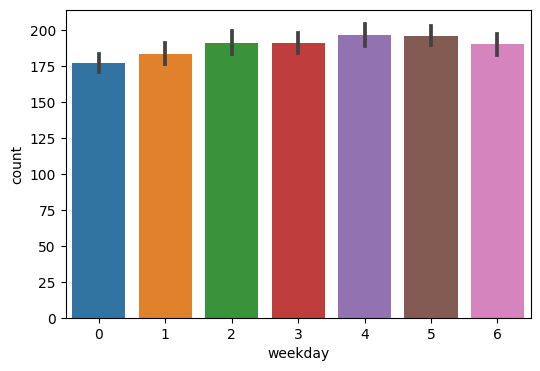

In [83]:
plt.figure(figsize = (6,4))
sns.barplot(x= 'weekday', y = 'count', data=df)

C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\414600843.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'weather', y = 'count', data=df, ci=None)


<AxesSubplot: xlabel='weather', ylabel='count'>

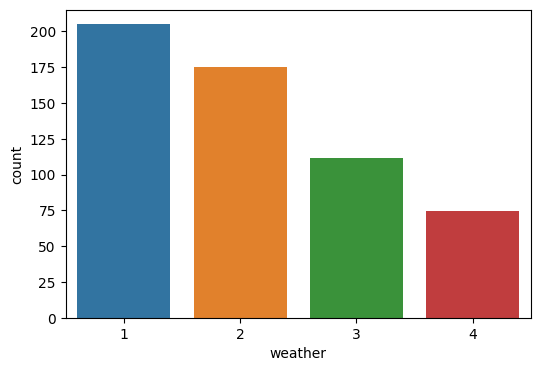

In [84]:
plt.figure(figsize = (6,4))
sns.barplot(x= 'weather', y = 'count', data=df, ci=None)

In [85]:
df.head(2)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\936201373.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x= 'hour', y = 'count',hue= 'season', data=df,palette="muted", ci= None)


<AxesSubplot: xlabel='hour', ylabel='count'>

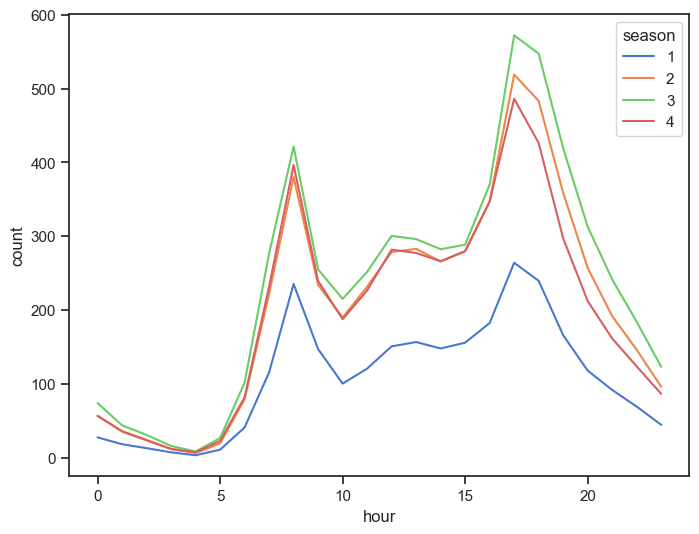

In [86]:
plt.figure(figsize = (8,6))
sns.set_theme(style="ticks")
sns.lineplot(x= 'hour', y = 'count',hue= 'season', data=df,palette="muted", ci= None)

* Same Graph but with confidence interval (CI)

<AxesSubplot: xlabel='hour', ylabel='count'>

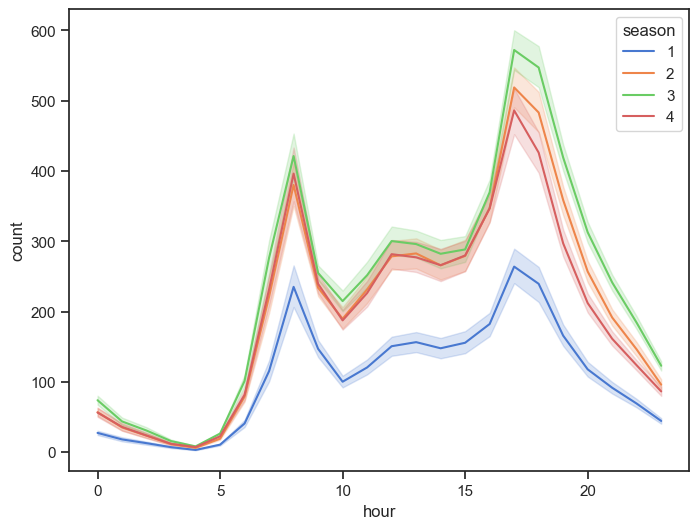

In [87]:
plt.figure(figsize = (8,6))
sns.set_theme(style="ticks")
sns.lineplot(x= 'hour', y = 'count',hue= 'season', data=df,palette="muted")

### Observations
*It is seen that the count of Rented bike starts increasing at hour 6-8 then decreases and stays steady during the afternoob time then it increases again at 14- 18 o clock then decreases again. 
* For spring season we have very less number of rented bikes usage. 
* We see that more Registered users are using bike on the weekday ( working days) and then as weekend comes the casual count is increasing. 
* Then umber of bikes rented on each day is pretty steady no sudden drip or fall. 

As we can see all the necessary information is already extracted from the dteday column and we dont need any more information from that column so we can drop it, 
## Dropping unnecessary columns and also checking if any column is giving us multicollinearity issue with our target column, i.e. count

In [88]:
df.drop(['instant','date','year'], axis = 1, inplace= True)

In [89]:
object_columns = ['season','month','hour','holiday','weekday','workingday','weather']
for column in object_columns:
  df[column] = df[column].astype('object')

* Note i did this step so that we dont get correlation values for object type columns because i am going to one hot incode this perticular columns before feeding them into our model

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   month       17379 non-null  object 
 2   hour        17379 non-null  object 
 3   holiday     17379 non-null  object 
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  object 
 6   weather     17379 non-null  object 
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   humidity    17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  count       17379 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 1.9+ MB


## Checking for coorelation

C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\1862443053.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

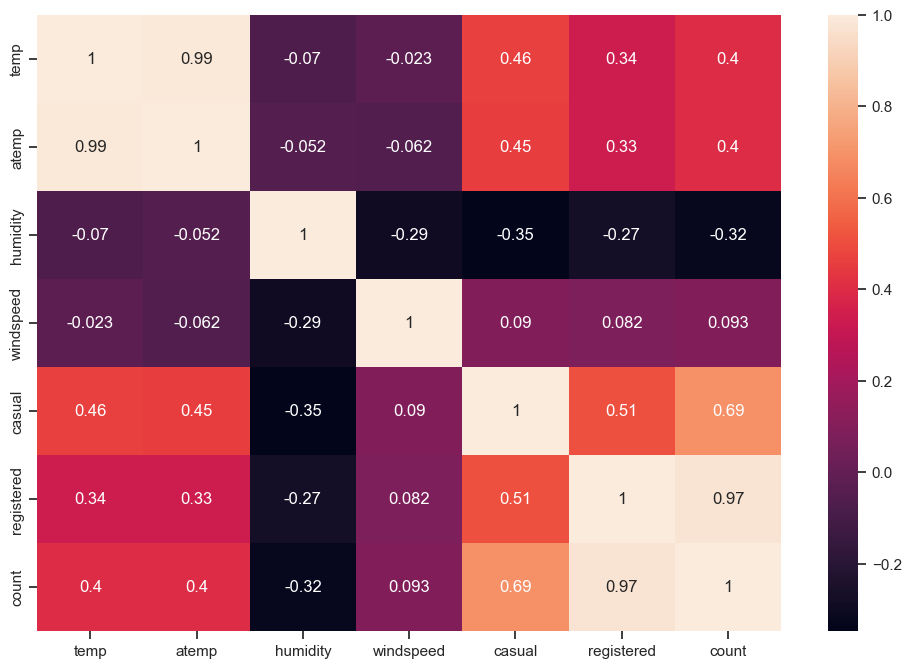

In [91]:
correlation = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True)

## Observations
* We can see that the temp column and a temp column as HIGHLY correlated to each other which will give us multicollinearity issue. So dropping any one of them is the right choice.
* We can also see that casual & Registered column are also highly related to our target column , i.e. count which is ovios since count is derived by adding the values of this columns. so i am dropping casual and registered column so that we can get a better score.
* We can also see that Windspeed column is about 0.093 related to our target column we can drop that column also.

C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\1265679817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'])


<AxesSubplot: xlabel='count', ylabel='Density'>

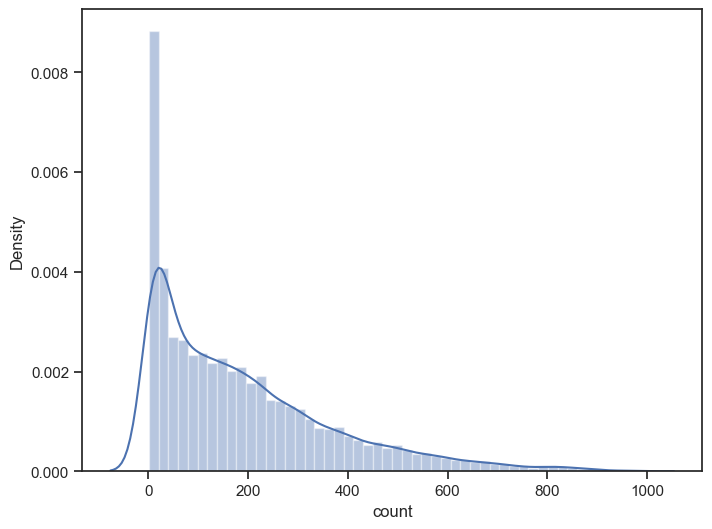

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(df['count'])

The values are not evenly Distributed ( Does not form a proper bell curve ) current curve is right scwered curve
* So Normalizing the values to get a better and uniform curve

## There are many numbers of outliers in our target column, i.e. the count column
* Removing the outliers for better accuracy

In [93]:
df['count'] = np.log1p(df['count']) 

In [94]:
df['count'].value_counts().sort_index()

0.693147    158
1.098612    208
1.386294    224
1.609438    231
1.791759    260
           ... 
6.875232      1
6.876265      1
6.878326      1
6.884487      1
6.885510      1
Name: count, Length: 869, dtype: int64

#### As you can see we are getting some values which are coming 0 after normalization.
Since there are a lot values closer to 0 i would be removing them because they can cause errors in my machine learning models.

C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\1265679817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'])


<AxesSubplot: xlabel='count', ylabel='Density'>

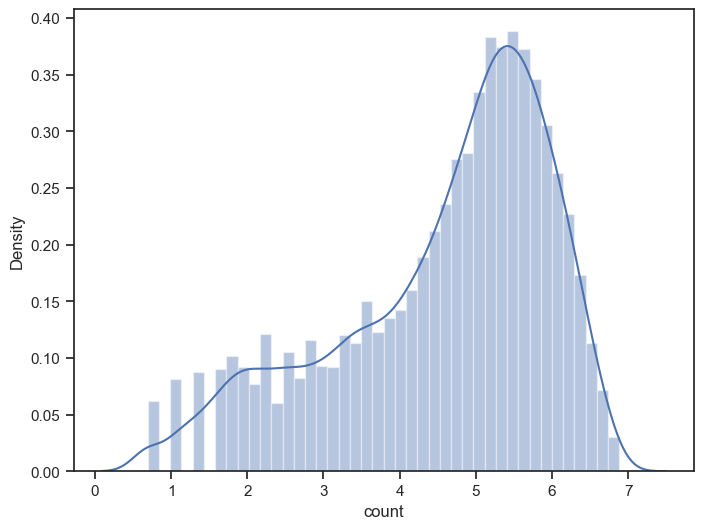

In [95]:
plt.figure(figsize=(8,6))
sns.distplot(df['count'])

In [96]:
df = df[np.abs(df['count']) - df['count'].mean() <= (3 * df['count'].std())]

<AxesSubplot: xlabel='count'>

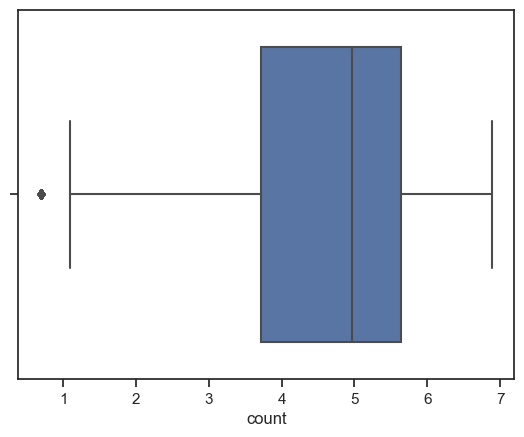

In [97]:
sns.boxplot(x='count',data=df)

In [98]:
drop_temp = df[(df['temp'] > 20) & (df['temp'] >10)].index
df = df.drop(drop_temp)

## Now we have eliminated most of the residual values. 
* We have 1 residual point but its okay it wont affect much

### Doing one hot encoding for the object data type columns

In [99]:
df.shape

(17379, 14)

In [100]:
df['count'].value_counts().sort_index()

0.693147    158
1.098612    208
1.386294    224
1.609438    231
1.791759    260
           ... 
6.875232      1
6.876265      1
6.878326      1
6.884487      1
6.885510      1
Name: count, Length: 869, dtype: int64

In [101]:
df_one_hot = df.copy()
def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column], prefix = column, drop_first= True)], axis = 1)
  data = data.drop([column], axis = 1 )
  return data

object_columns = ['season','month','hour','holiday','weekday','workingday','weather']
for column in object_columns:
  df_one_hot = one_hot_encoding(df_one_hot,column)

df_one_hot.head()

C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\4181025980.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.concat([data,pd.get_dummies(data[column], prefix = column, drop_first= True)], axis = 1)
C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\4181025980.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.concat([data,pd.get_dummies(data[column], prefix = column, drop_first= True)], axis = 1)
C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\4181025980.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.concat([data,pd.get_dummies(data[column], prefix = column, drop_first= True)], axis = 1)
C:\Users\Azhar\AppData\Local\Temp\ipykernel_8780\

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.833213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.713572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.496508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.639057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [102]:
df_one_hot.drop(['atemp', 'windspeed', 'casual','registered'], axis = 1 , inplace = True)

In [103]:
X = df_one_hot.drop('count', axis = 1)
y= df_one_hot['count']

In [104]:
X.head(3)

,temp,humidity,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [105]:
X.columns

Index(['temp', 'humidity', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'holiday_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [106]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: count, Length: 17379, dtype: float64

In [108]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),
ExtraTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),
AdaBoostRegressor()]

In [109]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits= 5, random_state=54, shuffle=True)
    prediction = model_selection.cross_val_score(model,X,y, cv = kfold, scoring='neg_mean_squared_error')
    score = prediction.mean()
    print('Model: ', model)
    print('Score: ', abs(score))

In [110]:
for model in models:
    train(model)

Model:  LinearRegression()
Score:  0.40148081883193354
Model:  Ridge()
Score:  0.401363721562323


c:\Users\Azhar\Desktop\BikeShare\BikeShare_Internship_Regression_model\bikeshare\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Azhar\Desktop\BikeShare\BikeShare_Internship_Regression_model\bikeshare\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Azhar\Desktop\BikeShare\BikeShare_Internship_Regression_model\bikeshare\Lib\site-packages\s

Model:  HuberRegressor()
Score:  0.4183480927206589
Model:  ElasticNetCV()
Score:  0.40780388432543696
Model:  DecisionTreeRegressor()
Score:  0.3902756506742964
Model:  ExtraTreeRegressor()
Score:  0.37005777981958116
Model:  RandomForestRegressor()
Score:  0.20425889182741339
Model:  GradientBoostingRegressor()
Score:  0.3229475795189085
Model:  AdaBoostRegressor()
Score:  1.0913556209910837


### Creating a Hyper paramter tuned Regression Model using Random Forest Regressor


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [112]:
rfr = RandomForestRegressor()

In [113]:
parameters = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[None, 1,2],
    'min_samples_split' : [2,3,4,5]
}

In [114]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfr, parameters, cv = 3 )
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [115]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}

In [116]:
y_pred=grid.predict(X_test)
y_pred

array([5.82096187, 4.35424993, 2.44241345, ..., 3.99131807, 2.43151986,
       5.28846673])

In [117]:
grid.score(X_test,y_test)

0.8974415651986908

## Performace matrix for our model

### r Square and Adjusted r Square.

In [118]:
from sklearn.metrics import r2_score, mean_squared_error
r_score = r2_score(y_pred,y_test)
r_score

0.8825845450240564

In [119]:
### Adjusted r square 
adj_r = 1 - (1-r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_r

0.8812173413098512

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.45031083373903547

In [121]:
residuals = y_test - y_pred
residuals

12830    0.233477
8688     0.134386
7091    -0.832976
12230    0.217177
431     -1.791923
           ...   
4731     0.033473
15987    0.121181
10347    0.497318
4111     0.276530
11971   -0.284520
Name: count, Length: 4345, dtype: float64

In [123]:
y_test.value_counts().sort_index()

0.693147    38
1.098612    51
1.386294    69
1.609438    58
1.791759    60
            ..
6.795706     1
6.802395     1
6.804615     1
6.878326     1
6.885510     1
Name: count, Length: 682, dtype: int64

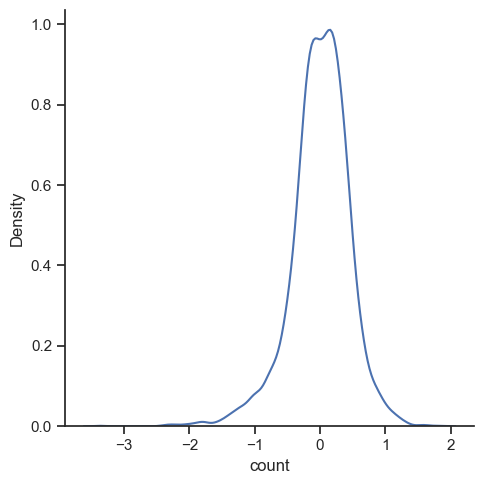

In [124]:
sns.displot(residuals, kind="kde")

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

## Root mean square error

print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.335059334648352
0.20277984698274526
0.45031083373903547


### Pickling our model and testing it

In [126]:
import pickle
pickle.dump(grid,open("bike_regression.pkl", "wb"))

In [127]:
pick_model = pickle.load(open("bike_regression.pkl", "rb"))
